In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import idx2numpy 

In [12]:
# Path of image and label binary data
train_images = './data/emnist-digits-train-images-idx3-ubyte.gz'
train_labels = './data/emnist-digits-train-labels-idx1-ubyte.gz'

# test_images = './data/emnist-digits-test-images-idx3-ubyte.gz'
# test_labels = './data/emnist-digits-test-labels-idx1-ubyte.gz'

In [13]:
with gzip.open(train_images) as a, gzip.open(train_labels) as b:
    X_train = idx2numpy.convert_from_file(a)
    y_train = idx2numpy.convert_from_file(b)
        
# with gzip.open(test_images) as c, gzip.open(test_labels) as d:
#     xtest = idx2numpy.convert_from_file(c)
#     ytest = idx2numpy.convert_from_file(a)

In [28]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(240000, 784)

In [29]:
img_shape = (64,84)
dataset_size = 5000
max_digits = 3

In [16]:
np.random.seed(42)

In [49]:
def combine(images, labels, max_digits, canvas_size):
    nb_digits = np.random.randint(low=2, high=max_digits+2)
    rand_indices = np.random.randint(0, len(images), nb_digits)
    
    src_images = images[rand_indices]
    src_labels = labels[rand_indices]
    
    glabels = np.zeros([*canvas_size, 10], dtype=images.dtype)
    
    for i in range(nb_digits):
        x_off_start = np.random.randint(i*28, i*28+10)
        y_off_start = np.random.randint(0, canvas_size[0] - 28+1)
        
        x_off_end = x_off_start + 28
        y_off_end = y_off_start + 28
        
        if x_off_end <= canvas_size[1] and y_off_end <= canvas_size[0]:
            src_img = src_images[i].reshape([28, 28]).transpose()
            src_digit = src_labels[i]
            glabels[y_off_start:y_off_end, x_off_start:x_off_end, src_digit] = src_img
            
    canvas = np.max(glabels, axis=2)
    labels = np.clip(glabels, a_min=0, a_max=1)
    
    return canvas, glabels

In [50]:
combined = []
segmented = []

In [51]:
for i in range(dataset_size):
    img, seg = combine(X_train, y_train, max_digits, img_shape)
    combined.append(img)
    segmented.append(seg)

In [52]:
np.save('./data/combined.npy',combined)
np.save('./data/segmented.npy',segmented)

In [53]:
combined = np.load('./data/combined.npy')
segmented = np.load('./data/segmented.npy')

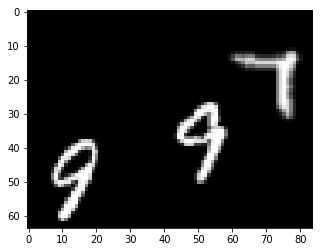

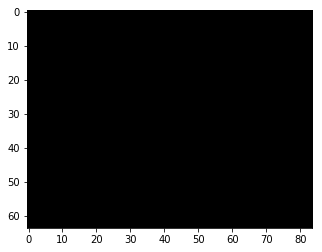

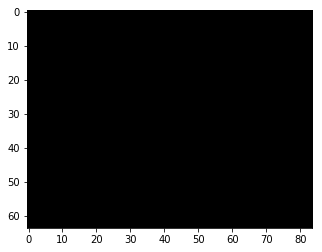

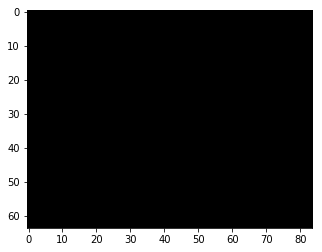

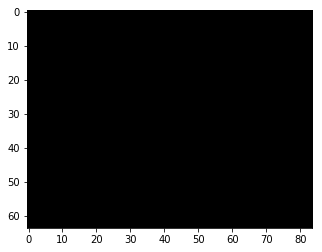

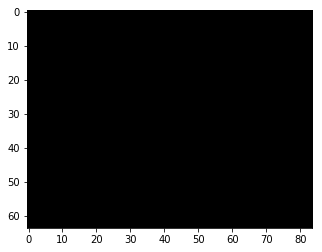

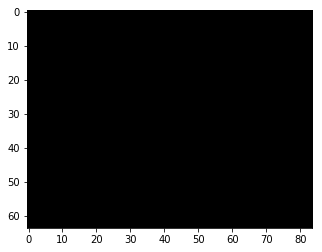

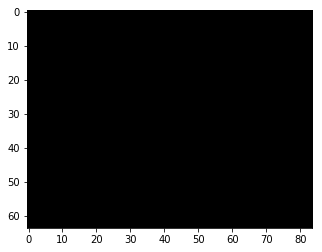

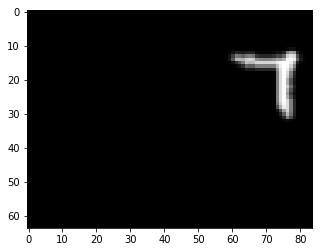

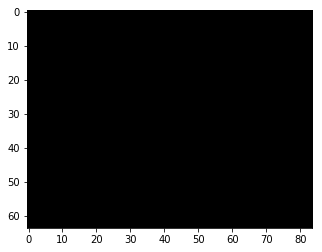

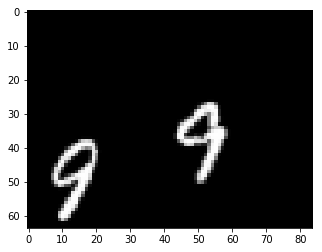

In [60]:
rand_index = np.random.randint(0, len(combined))
c, s = combined[rand_index], segmented[rand_index]

plt.imshow(c, cmap='gray')
plt.show()

for i in range(10):
    #plt.figure(figsize=(0.5,0.5))
    plt.imshow(s[:,:,i],cmap='gray')
    plt.show()